In [1]:
%%time
import malaya
import tweepy
import pandas as pd
import re   
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

c:\Users\User\myenv\lib\site-packages\malaya_boilerplate\frozen_graph.py:28: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  warnings.warn(


CPU times: total: 3.73 s
Wall time: 3.77 s


In [2]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [3]:
consumer_key = os.getenv('CONSUMER_KEY')
consumer_secret = os.getenv('CONSUMER_SECRET')
access_token = os.getenv('ACCESS_SECRET')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [4]:
api=tweepy.API(auth)

In [5]:
# regex_txt = "https"
# regex = re.compile(regex_txt, re.IGNORECASE)
# match = regex.search(regex_txt)  # From your file reading code.
# if match is not None:
#     break
q="brgsjks"

In [6]:
public_tweets=api.search_tweets(q+' exclude:retweets exclude:replies',count='10',tweet_mode="extended")
i=1
for tweet in public_tweets:
    print(str(i)+')'+tweet.full_text+" \n")
    i=i+1

1)Bangun sebab dah biasa bangun awal https://t.co/VyXTesJJAd 

2)saling jeles menjelesi https://t.co/D4u4ttY8W6 

3)Sebab memang tercelik matanya https://t.co/GOQ6y29KGb 

4)Kalau hang ada problem dengan parents hang, pi la sound depan depan, meratib kat social media bukan la settle problem pun. Dia macam hang ajak orang maki beramai ramai lepastu sama je la problem tak hilang. 

5)that white iced chocolate from gloria jean's is so underrated. sedap nyaaaaaa https://t.co/gCukHfBuuR 

6)Mahatma Gandhi? https://t.co/tnVOXViAjg 

7)Yes https://t.co/44EXcV2Aoj 

8)Jum ? @syahmi_azuan https://t.co/N5YEMh3Tow 

9)HAHAHA mestilah yang second tu 😔 https://t.co/JdkQ6l1MCR 

10)safe flight M, take care &amp; see you soon 🥺💫 



In [7]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame([tweet.full_text for tweet in public_tweets], columns=['Tweets'])

# Show 5 rows of data
df.head()

,Tweets
0,Bangun sebab dah biasa bangun awal https://t.co/VyXTesJJAd
1,saling jeles menjelesi https://t.co/D4u4ttY8W6
2,Sebab memang tercelik matanya https://t.co/GOQ6y29KGb
3,"Kalau hang ada problem dengan parents hang, pi la sound depan depan, meratib kat social media bukan la settle problem pun. Dia macam hang ajak orang maki beramai ramai lepastu sama je la problem tak hilang."
4,that white iced chocolate from gloria jean's is so underrated. sedap nyaaaaaa https://t.co/gCukHfBuuR


In [8]:
# filter columns
def cleanTweet(tweet):
    tweet= re.sub(r'https?:\/\/\S+','',tweet) #remove hyperlinks
    tweet=re.sub(r'&[A-Za-z0-9!@#$%^&*()]','', tweet) 
    return tweet

df['Tweets']=df['Tweets'].apply(cleanTweet)
df['name_length'] = df['Tweets'].str.len()
df.head()

,Tweets,name_length
0,Bangun sebab dah biasa bangun awal,35
1,saling jeles menjelesi,23
2,Sebab memang tercelik matanya,30
3,"Kalau hang ada problem dengan parents hang, pi la sound depan depan, meratib kat social media bukan la settle problem pun. Dia macam hang ajak orang maki beramai ramai lepastu sama je la problem tak hilang.",206
4,that white iced chocolate from gloria jean's is so underrated. sedap nyaaaaaa,78


In [9]:
# df = df[df['name_length'] > 1]    
df=df.drop(columns=['name_length'])
df.head()

,Tweets
0,Bangun sebab dah biasa bangun awal
1,saling jeles menjelesi
2,Sebab memang tercelik matanya
3,"Kalau hang ada problem dengan parents hang, pi la sound depan depan, meratib kat social media bukan la settle problem pun. Dia macam hang ajak orang maki beramai ramai lepastu sama je la problem tak hilang."
4,that white iced chocolate from gloria jean's is so underrated. sedap nyaaaaaa


In [10]:
model = malaya.sentiment.multinomial()

In [11]:
# MALAYA MULTINOMIAL MODEL
def getMultinomialSentiment(tweet):
    return model.predict([tweet])

df['Sentiment_1']= df['Tweets'].apply(getMultinomialSentiment)
# Show new data
df.head()

,Tweets,Sentiment_1
0,Bangun sebab dah biasa bangun awal,[negative]
1,saling jeles menjelesi,[negative]
2,Sebab memang tercelik matanya,[negative]
3,"Kalau hang ada problem dengan parents hang, pi la sound depan depan, meratib kat social media bukan la settle problem pun. Dia macam hang ajak orang maki beramai ramai lepastu sama je la problem tak hilang.",[negative]
4,that white iced chocolate from gloria jean's is so underrated. sedap nyaaaaaa,[neutral]


In [12]:
# MALAYA MULTINOMIAL MODEL PROBABILITY
def getMultinomialProba(tweet):
    return model.predict_proba([tweet])

df['Probability']= df['Tweets'].apply(getMultinomialProba)
# Show new data ()
print(df['Probability'])                                                            

0     [{'negative': 0.5052997923980653, 'neutral': 0.2419181649328261, 'positive': 0.25278204266910775}]
1     [{'negative': 0.4162436645908023, 'neutral': 0.22966294137040608, 'positive': 0.3540933940387908}]
2      [{'negative': 0.40172810417194443, 'neutral': 0.335425864636991, 'positive': 0.2628460311910641}]
3    [{'negative': 0.9132081925873065, 'neutral': 0.03984891584108896, 'positive': 0.04694289157160745}]
4    [{'negative': 0.24570159538093878, 'neutral': 0.39365366474156727, 'positive': 0.3606447398774963}]
5    [{'negative': 0.28250295327916536, 'neutral': 0.33233064563636544, 'positive': 0.3851664010844682}]
6     [{'negative': 0.4431467899532565, 'neutral': 0.23260536705473897, 'positive': 0.3242478429920049}]
7    [{'negative': 0.25223007100965295, 'neutral': 0.4469667801174151, 'positive': 0.30080314887293186}]
8     [{'negative': 0.3643630531242803, 'neutral': 0.3382207407262523, 'positive': 0.29741620614946784}]
9     [{'negative': 0.30041144902346306, 'neutral': 0.2

In [13]:
quantized_model = malaya.sentiment.transformer(model = 'fastformer', quantized = True)

Load quantized model will cause accuracy drop.


In [14]:
# MALAYA MULTINOMIAL MODEL
def getFastSentiment(tweet):
    return model.predict([tweet])

df['Sentiment_2']= df['Tweets'].apply(getFastSentiment)
# Show new data
df.head()

,Tweets,Sentiment_1,Probability,Sentiment_2
0,Bangun sebab dah biasa bangun awal,[negative],"[{'negative': 0.5052997923980653, 'neutral': 0.2419181649328261, 'positive': 0.25278204266910775}]",[negative]
1,saling jeles menjelesi,[negative],"[{'negative': 0.4162436645908023, 'neutral': 0.22966294137040608, 'positive': 0.3540933940387908}]",[negative]
2,Sebab memang tercelik matanya,[negative],"[{'negative': 0.40172810417194443, 'neutral': 0.335425864636991, 'positive': 0.2628460311910641}]",[negative]
3,"Kalau hang ada problem dengan parents hang, pi la sound depan depan, meratib kat social media bukan la settle problem pun. Dia macam hang ajak orang maki beramai ramai lepastu sama je la problem tak hilang.",[negative],"[{'negative': 0.9132081925873065, 'neutral': 0.03984891584108896, 'positive': 0.04694289157160745}]",[negative]
4,that white iced chocolate from gloria jean's is so underrated. sedap nyaaaaaa,[neutral],"[{'negative': 0.24570159538093878, 'neutral': 0.39365366474156727, 'positive': 0.3606447398774963}]",[neutral]


In [15]:
df['Tweets'].shape

(10,)

In [16]:
print(df.values)

[['Bangun sebab dah biasa bangun awal ' list(['negative'])
  list([{'negative': 0.5052997923980653, 'neutral': 0.2419181649328261, 'positive': 0.25278204266910775}])
  list(['negative'])]
 ['saling jeles menjelesi ' list(['negative'])
  list([{'negative': 0.4162436645908023, 'neutral': 0.22966294137040608, 'positive': 0.3540933940387908}])
  list(['negative'])]
 ['Sebab memang tercelik matanya ' list(['negative'])
  list([{'negative': 0.40172810417194443, 'neutral': 0.335425864636991, 'positive': 0.2628460311910641}])
  list(['negative'])]
 ['Kalau hang ada problem dengan parents hang, pi la sound depan depan, meratib kat social media bukan la settle problem pun. Dia macam hang ajak orang maki beramai ramai lepastu sama je la problem tak hilang.'
  list(['negative'])
  list([{'negative': 0.9132081925873065, 'neutral': 0.03984891584108896, 'positive': 0.04694289157160745}])
  list(['negative'])]
 ["that white iced chocolate from gloria jean's is so underrated. sedap nyaaaaaa "
  list(['

In [17]:
# Save dataFrame to .csv
df.to_csv(r'tweet_malaya_brgsjks.csv', index = False)

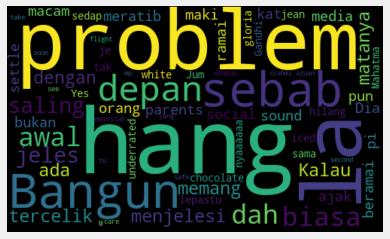

In [18]:
# Plot the World CLoud
allWords= ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300, random_state=21, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

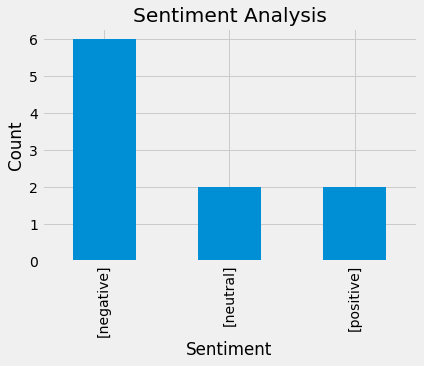

In [20]:
df['Sentiment_2'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
df['Sentiment_2'].value_counts().plot(kind='bar')
plt.show()
